In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease/dataset.csv


In [23]:
df = pd.read_csv('/kaggle/input/parkinsons-disease/dataset.csv')

In [5]:
df.shape

(1195, 24)

In [6]:
df.iloc[:,:10]

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0     phon_R01_S01_1   119.992000    157.302000     74.997000        0.007840   
1     phon_R01_S01_2   122.400000    148.650000    113.819000        0.009680   
2     phon_R01_S01_3   116.682000    131.111000    111.555000        0.010500   
3     phon_R01_S01_4   116.676000    137.871000    111.366000        0.009970   
4     phon_R01_S01_5   116.014000    141.781000    110.655000        0.012840   
...              ...          ...           ...           ...             ...   
1190      synth_7756   151.028206    179.206312    118.797466        0.006594   
1191      synth_5355   161.752472    211.299774    114.784598        0.006397   
1192      synth_6356   148.323186    194.399282    118.570170        0.006335   
1193      synth_7098   152.106305    209.880095    112.903699        0.005298   
1194      synth_1997   151.964173    211.553642    120.752900        0.005573   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  
0             0.000070  0.003700  0.005540    0.011090      0.043740  
1             0.000080  0.004650  0.006960    0.013940      0.061340  
2             0.000090  0.005440  0.007810    0.016330      0.052330  
3             0.000090  0.005020  0.006980    0.015050      0.054920  
4             0.000110  0.006550  0.009080    0.019660      0.064250  
...                ...       ...       ...         ...           ...  
1190          0.000040  0.003458  0.003513    0.008731      0.027186  
1191          0.000045  0.003545  0.003017    0.009591      0.028982  
1192          0.000044  0.003483  0.003386    0.008980      0.029598  
1193          0.000041  0.002778  0.003506    0.009388      0.029550  
1194          0.000040  0.003039  0.002910    0.011217      0.031296  

[1195 rows x 10 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

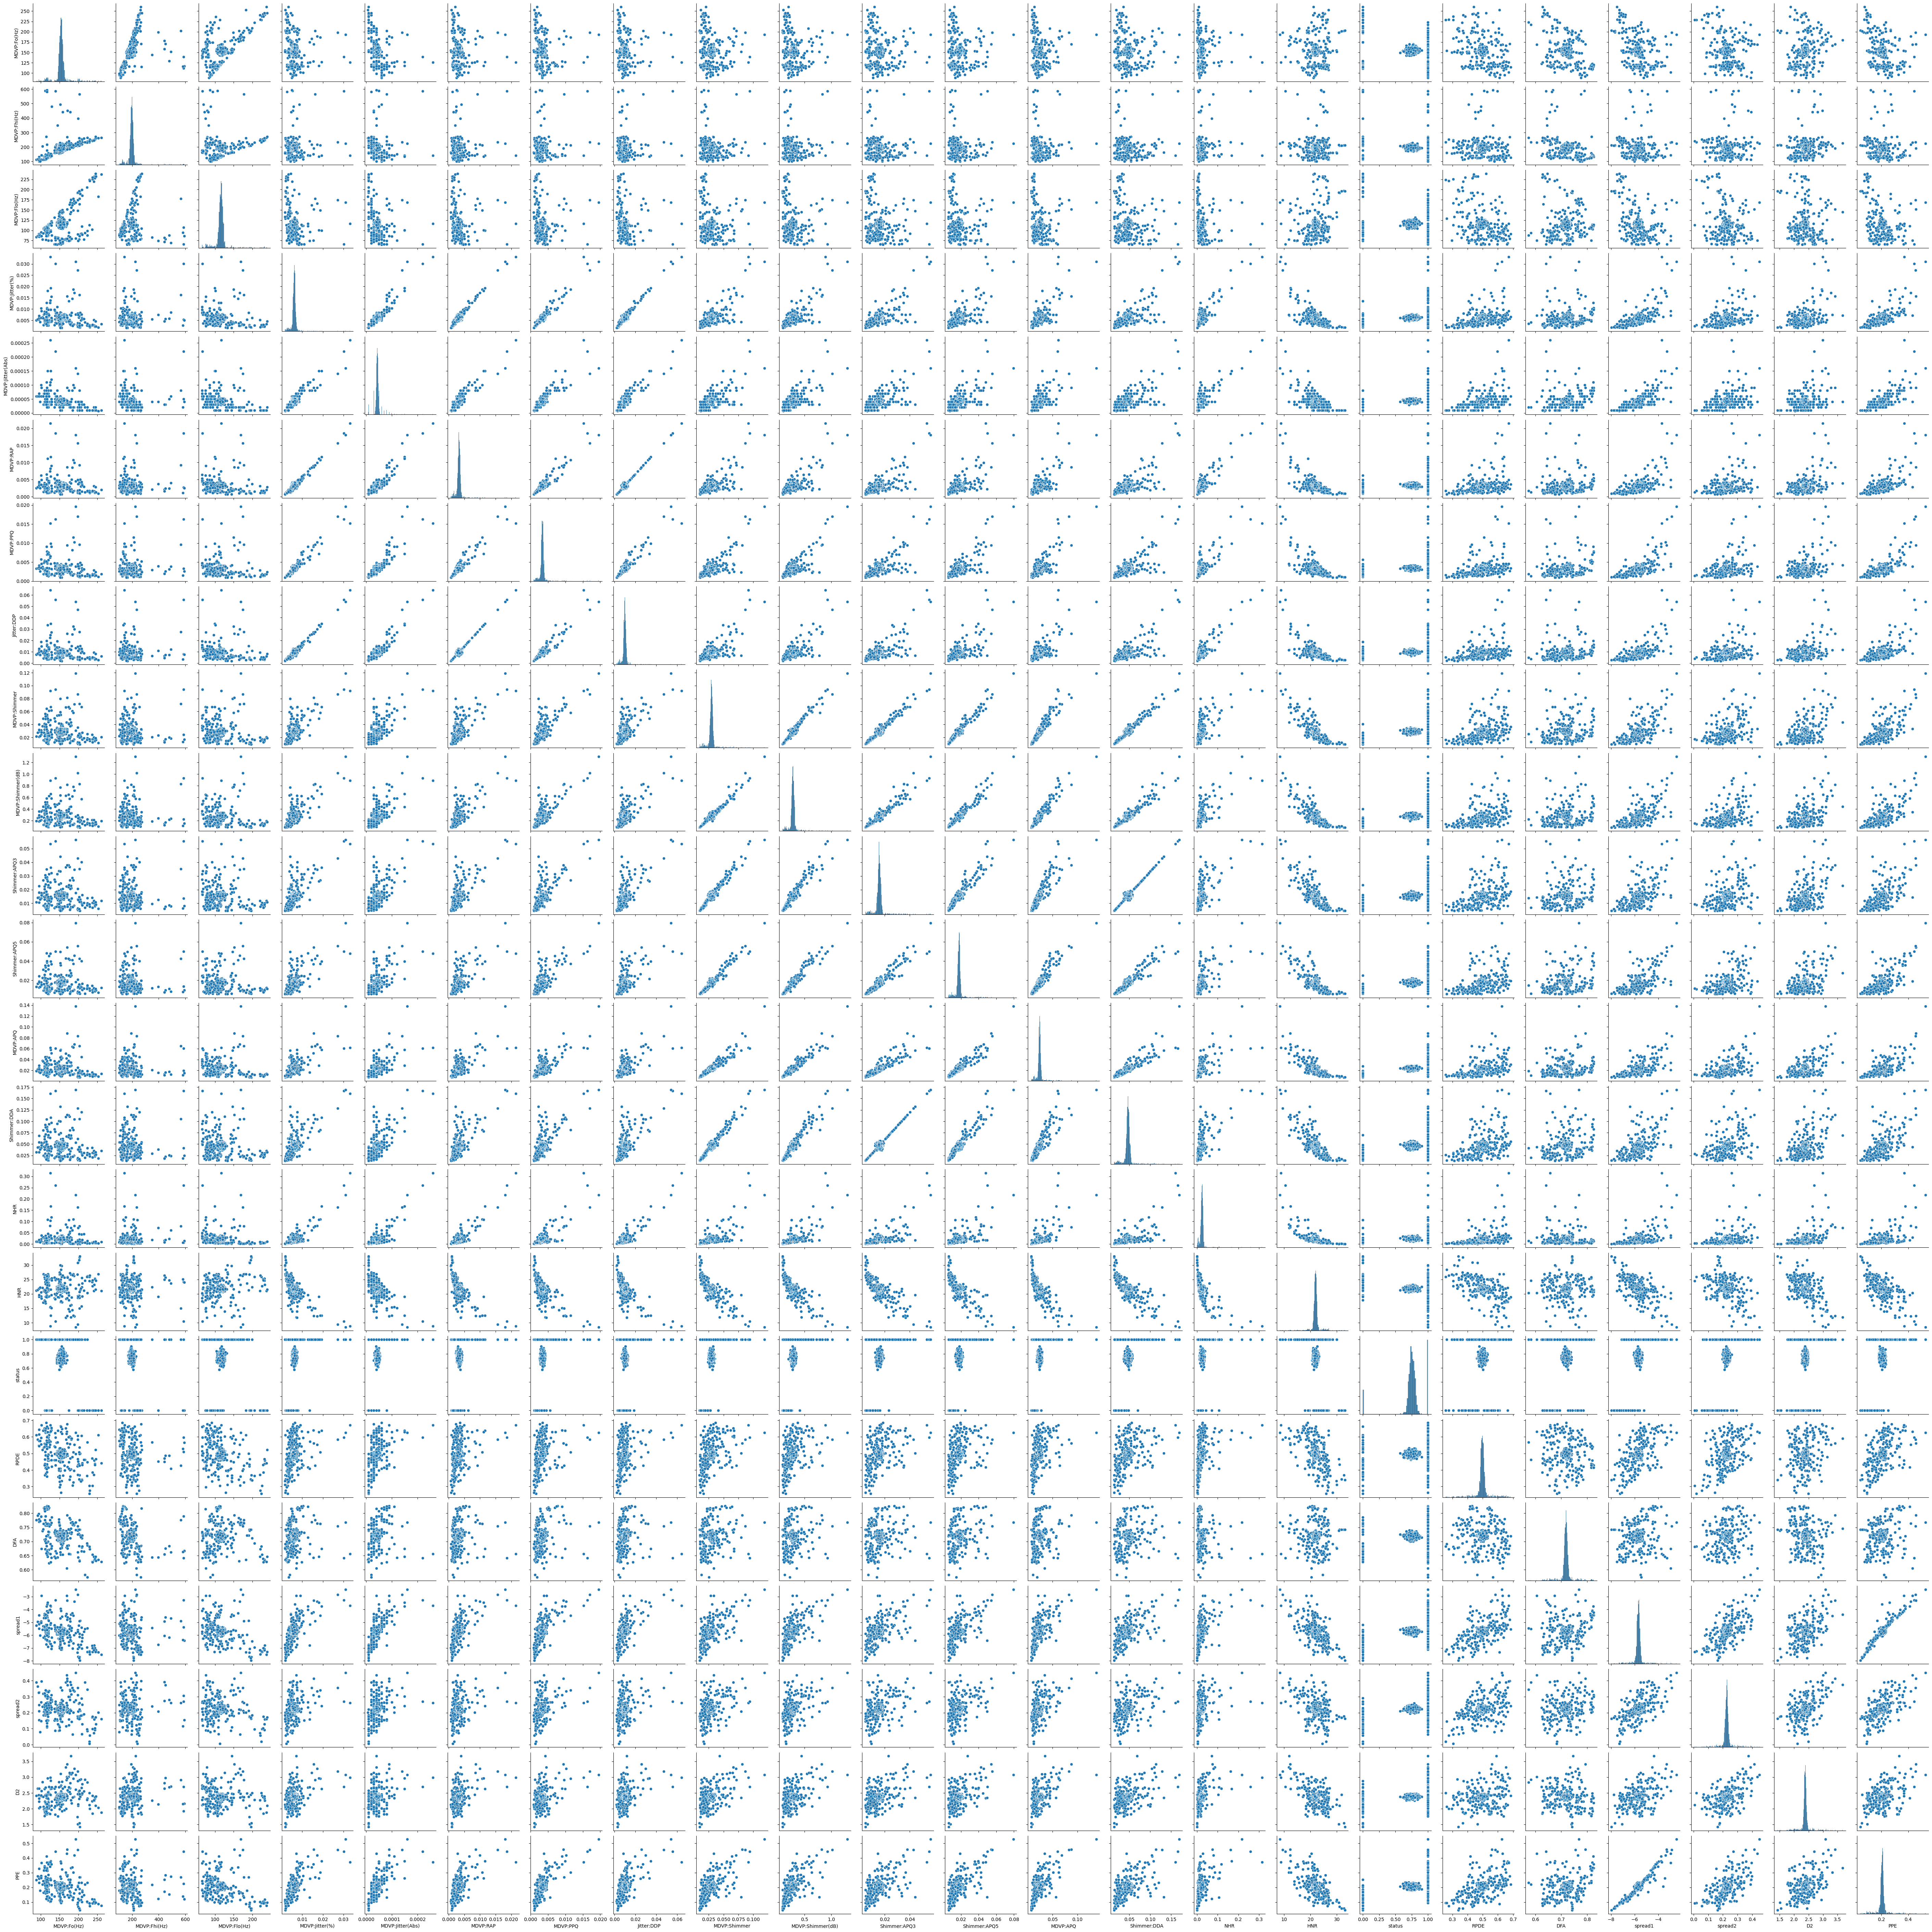

In [10]:
import seaborn as sns
sns.pairplot(df)

In [12]:
df.iloc[:,10:]

MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426000      0.021820      0.031300  0.029710     0.065450   
1             0.626000      0.031340      0.045180  0.043680     0.094030   
2             0.482000      0.027570      0.038580  0.035900     0.082700   
3             0.517000      0.029240      0.040050  0.037720     0.087710   
4             0.584000      0.034900      0.048250  0.044650     0.104700   
...                ...           ...           ...       ...          ...   
1190          0.265100      0.015080      0.018273  0.024836     0.050788   
1191          0.301784      0.015506      0.018827  0.024254     0.049785   
1192          0.290663      0.015307      0.018145  0.024838     0.051215   
1193          0.289629      0.015220      0.017163  0.025529     0.049023   
1194          0.335169      0.015293      0.016371  0.023404     0.049004   

           NHR        HNR    status      RPDE       DFA   spread1   spread2  \
0     0.022110  21.033000  1.000000  0.414783  0.815285 -4.813031  0.266482   
1     0.019290  19.085000  1.000000  0.458359  0.819521 -4.075192  0.335590   
2     0.013090  20.651000  1.000000  0.429895  0.825288 -4.443179  0.311173   
3     0.013530  20.644000  1.000000  0.434969  0.819235 -4.117501  0.334147   
4     0.017670  19.649000  1.000000  0.417356  0.823484 -3.747787  0.234513   
...        ...        ...       ...       ...       ...       ...       ...   
1190  0.021377  21.884979  0.736271  0.499528  0.727604 -5.772439  0.234236   
1191  0.020925  21.973752  0.798377  0.499209  0.728558 -5.604039  0.235680   
1192  0.021530  21.615298  0.771907  0.497459  0.717687 -5.770640  0.233789   
1193  0.026806  21.561977  0.704315  0.486495  0.722529 -5.677169  0.236918   
1194  0.020198  21.637952  0.735387  0.508520  0.720055 -5.884754  0.228012   

            D2       PPE  
0     2.301442  0.284654  
1     2.486855  0.368674  
2     2.342259  0.332634  
3     2.405554  0.368975  
4     2.332180  0.410335  
...        ...       ...  
1190  2.392305  0.210778  
1191  2.362850  0.209570  
1192  2.410545  0.223595  
1193  2.427505  0.218734  
1194  2.395277  0.197326  

[1195 rows x 14 columns]

In [14]:
df.sample(55)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
113   phon_R01_S26_5   210.141000    232.706000    185.258000        0.005340   
957       synth_8998   148.844200    184.606301    118.799188        0.005375   
920       synth_7634   157.076049    201.258939    120.071549        0.005597   
194   phon_R01_S50_6   214.289000    260.277000     77.973000        0.005670   
183   phon_R01_S49_1   117.226000    123.925000    106.656000        0.004170   
525       synth_7752   160.197807    202.885016    123.720475        0.006272   
842       synth_8786   153.364374    207.300791    116.649843        0.006945   
661       synth_9888   155.353497    209.371742    111.120619        0.005723   
609       synth_8819   158.565834    202.179095    114.733169        0.006081   
387       synth_8361   151.526231    189.809335    120.572331        0.006228   
35    phon_R01_S07_6   201.464000    210.565000    195.708000        0.001980   
417       synth_6867   159.351262    207.176872    114.263407        0.006584   
845       synth_7379   153.814767    193.002314    108.876246        0.005713   
338       synth_7459   151.262190    181.576432    117.789668        0.006707   
134   phon_R01_S33_1   106.516000    112.777000     93.105000        0.005890   
971       synth_9873   158.509405    195.718229    121.385686        0.005601   
57    phon_R01_S16_4   117.274000    129.916000    110.402000        0.007520   
1036      synth_5271   159.250401    205.874571    116.590799        0.005957   
1189      synth_7170   160.358805    185.880356    120.173617        0.006293   
1161      synth_7459   155.482259    200.107068    113.538116        0.005866   
1014      synth_4397   154.910699    185.979371    123.812135        0.005614   
362       synth_2301   160.067115    198.275125    117.352307        0.007141   
782       synth_1937   151.808544    183.392930    118.171820        0.006453   
318       synth_6116   152.325960    189.095252    123.833314        0.005221   
178   phon_R01_S44_2   148.790000    158.359000    138.990000        0.003090   
428       synth_6104   158.824683    199.215403    113.918343        0.007199   
831       synth_2863   158.349497    197.081179    120.030537        0.006479   
1038      synth_1445   148.297447    208.004388    116.816938        0.005949   
211       synth_2959   150.463622    203.323973    122.382178        0.006718   
1188      synth_4486   161.347106    195.567784    120.282318        0.006510   
550       synth_2081   161.085250    208.438718    117.130108        0.005877   
772       synth_5878   159.428126    188.703201    113.941707        0.006447   
603       synth_9784   155.888110    204.939671    114.481488        0.005811   
263       synth_8397   161.278012    204.365787    117.952858        0.006327   
641       synth_2207   149.195663    183.426006    123.523022        0.005631   
1047      synth_6707   147.151020    198.113985    113.008715        0.006212   
1144      synth_5775   155.934949    182.467845    120.893294        0.006011   
839       synth_6100   154.030783    207.022872    122.988883        0.006019   
266       synth_7673   154.549545    201.057241    118.854985        0.006016   
166   phon_R01_S42_2   237.323000    243.709000    229.256000        0.003030   
18    phon_R01_S05_1   153.046000    175.829000     68.623000        0.007420   
912       synth_1149   151.796384    196.055922    117.827229        0.006358   
120   phon_R01_S27_6   128.940000    479.697000     88.251000        0.005810   
974       synth_7787   158.931610    193.214607    110.784500        0.006497   
357       synth_3025   155.161003    206.002000    120.629690        0.006410   
852       synth_2663   150.403298    194.759415    113.043899        0.005625   
229       synth_1679   148.706634    200.030428    113.677936        0.006077   
696       synth_2016   154.732501    188.439878    111.428688        0.005841   
206       synth_7954   153.127210    189.782517

In [24]:
df.status = np.where(df.status>0.7,1,0)

In [25]:
df.sample(100)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
73    phon_R01_S19_2   112.014000    588.518000    107.024000        0.005330   
720       synth_3720   155.071429    197.939835    123.803614        0.005850   
70    phon_R01_S18_5   142.729000    162.408000     65.476000        0.008310   
104   phon_R01_S25_2   154.003000    160.267000    128.621000        0.001830   
206       synth_7954   153.127210    189.782517    125.259420        0.007292   
...              ...          ...           ...           ...             ...   
603       synth_9784   155.888110    204.939671    114.481488        0.005811   
1069      synth_6533   169.895642    183.114212    116.685575        0.006289   
524       synth_2246   156.609787    203.638234    116.620541        0.005725   
196       synth_9887   152.599769    193.821528    112.795875        0.005749   
977       synth_2711   152.348598    187.381476    114.363489        0.005582   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
73            0.000050  0.002680  0.003290    0.008050      0.024480  ...   
720           0.000040  0.002986  0.003199    0.008777      0.027995  ...   
70            0.000060  0.004690  0.004190    0.014070      0.034850  ...   
104           0.000010  0.000760  0.001000    0.002290      0.010300  ...   
206           0.000042  0.003192  0.004150    0.009773      0.030269  ...   
...                ...       ...       ...         ...           ...  ...   
603           0.000044  0.003147  0.003414    0.009791      0.032384  ...   
1069          0.000044  0.002805  0.003160    0.010981      0.028594  ...   
524           0.000044  0.003190  0.003195    0.010611      0.030139  ...   
196           0.000044  0.003345  0.004124    0.011496      0.030349  ...   
977           0.000045  0.003289  0.003625    0.011749      0.031545  ...   

      Shimmer:DDA       NHR        HNR  status      RPDE       DFA   spread1  \
73       0.041200  0.006230  24.178000       1  0.509127  0.789532 -5.389129   
720      0.047020  0.028076  21.687222       1  0.504316  0.721147 -5.643856   
70       0.056050  0.025990  20.264000       1  0.489345  0.730387 -5.720868   
104      0.014060  0.002430  28.409000       1  0.263654  0.691483 -7.111576   
206      0.048015  0.028588  21.830101       1  0.499149  0.713838 -5.589281   
...           ...       ...        ...     ...       ...       ...       ...   
603      0.050144  0.029178  21.841416       1  0.516402  0.722152 -5.751575   
1069     0.047494  0.030808  21.913110       1  0.497492  0.707953 -5.699229   
524      0.042688  0.020666  22.584473       0  0.482858  0.717930 -5.618665   
196      0.051060  0.025007  21.961898       1  0.503811  0.714226 -5.868877   
977      0.047533  0.027223  21.664762       1  0.501874  0.716523 -5.593998   

       spread2        D2       PPE  
73    0.306636  1.928708  0.225461  
720   0.216170  2.315240  0.203676  
70    0.158830  2.277927  0.180828  
104   0.144780  2.065477  0.093193  
206   0.238114  2.443748  0.209155  
...        ...       ...       ...  
603   0.229976  2.367012  0.209558  
1069  0.247010  2.406299  0.211513  
524   0.210894  2.381504  0.217379  
196   0.213131  2.335698  0.208612  
977   0.224714  2.415945  0.199000  

[100 rows x 24 columns]

In [27]:
df.drop('name',axis = 1,inplace = True)

In [34]:
df.corr()['status']

MDVP:Fo(Hz)        -0.203101
MDVP:Fhi(Hz)       -0.087577
MDVP:Flo(Hz)       -0.213654
MDVP:Jitter(%)      0.153584
MDVP:Jitter(Abs)    0.183869
MDVP:RAP            0.139783
MDVP:PPQ            0.154319
Jitter:DDP          0.143343
MDVP:Shimmer        0.205411
MDVP:Shimmer(dB)    0.198117
Shimmer:APQ3        0.197328
Shimmer:APQ5        0.202281
MDVP:APQ            0.194209
Shimmer:DDA         0.183057
NHR                 0.100066
HNR                -0.202293
status              1.000000
RPDE                0.167568
DFA                 0.130207
spread1             0.314542
spread2             0.252044
D2                  0.194165
PPE                 0.282855
Name: status, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop('status',axis =1).values
y = df.status.values

In [39]:
sc = StandardScaler()
X_scalled = sc.fit_transform(X)

In [41]:
X_scalled

array([[-2.00505668, -1.05705123, -2.30339181, ...,  1.15988787,
        -0.51157664,  2.09285414],
       [-1.86437903, -1.28600671, -0.14008769, ...,  3.16226768,
         0.66403156,  4.35063267],
       [-2.19843004, -1.7501364 , -0.26624607, ...,  2.45479376,
        -0.25277709,  3.38216876],
       ...,
       [-0.3499218 , -0.07535613,  0.12466492, ...,  0.21263179,
         0.18019141,  0.4520722 ],
       [-0.12890838,  0.33430831, -0.19109162, ...,  0.30326907,
         0.28772337,  0.32145435],
       [-0.13721183,  0.37859492,  0.24629464, ...,  0.0452314 ,
         0.0833811 , -0.25381129]])

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X_scalled,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2')
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred)

0.9164345403899722

<Axes: >

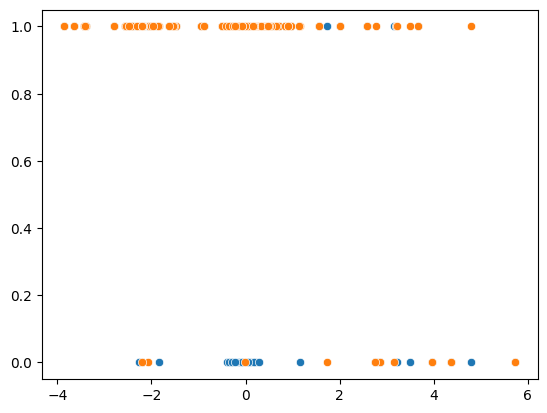

In [66]:
sns.scatterplot(x = X_test[:,0],y = y_test)
sns.scatterplot(x = X_test[:,0], y = y_pred)

In [65]:
X_test[:,0].shape

(359,)

In [63]:
y_test.shape

(359,)

In [67]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [70]:
from sklearn.svm import SVC

In [71]:
sm = SVC(degree=5)

In [73]:
sm.fit(X_train,y_train)

SVC(degree=5)

In [75]:
y_pred = sm.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred)

0.9220055710306406

In [77]:
from sklearn.naive_bayes import BernoulliNB

In [79]:
model = BernoulliNB()

In [80]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8607242339832869

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9220055710306406

In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.871866295264624

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)
X_train.shape

(836, 22)

In [109]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [110]:
model = Sequential()


In [111]:
model.add(Dense(128,activation = 'relu',input_dim =(22) ))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5,
                               restore_best_weights=True) 

In [115]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=100,verbose=True,callbacks=[early_stopping])

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9138 - loss: 0.2673 - val_accuracy: 0.9220 - val_loss: 0.2560
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9070 - loss: 0.2889 - val_accuracy: 0.9304 - val_loss: 0.2541
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9116 - loss: 0.2692 - val_accuracy: 0.9248 - val_loss: 0.2490
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9101 - loss: 0.2569 - val_accuracy: 0.9220 - val_loss: 0.2515
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9198 - loss: 0.2419 - val_accuracy: 0.9220 - val_loss: 0.2552
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9150 - loss: 0.2504 - val_accuracy: 0.9304 - val_loss: 0.2568
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9162 - loss: 0.2425 - val_accuracy: 0.9248 - val_loss: 0.2503
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9250 - loss: 0.2289 - val_accuracy: 0.9331 -

In [117]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [118]:
y_pred = np.where(y_pred > 0.5,1,0)

In [119]:
accuracy_score(y_test,y_pred)

0.9331476323119777

In [129]:
val_loss = history.history['val_loss']
loss = history.history['loss']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

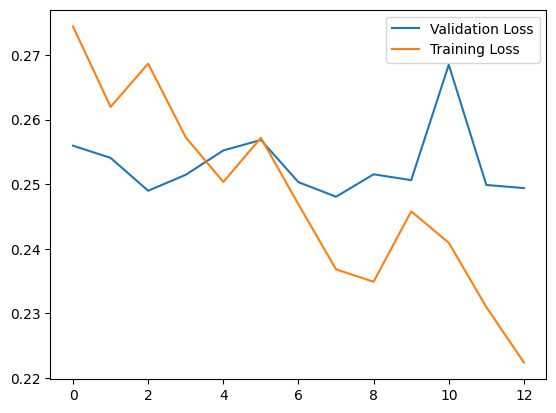

In [136]:
import matplotlib.pyplot as plt
sns.lineplot(x=range(len(val_loss)), y=val_loss, label='Validation Loss')
sns.lineplot(x=range(len(loss)), y=loss, label='Training Loss')
plt.legend()
